In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from xgboost import XGBClassifier

%matplotlib inline


In [173]:
df = pd.read_csv('wine_prediction.csv')
df1 = pd.read_csv('wine_prediction.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


FIRST LETS TRY XGBOOST METHOD:

In [174]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates', 'alcohol']

In [175]:
def normalize(df1, cols):
    for x in cols:
        df1[x]=df1[x]/df1[x].max()

normalize(df1, cols)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,5
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718,5
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718,5
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718,6
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.389937,0.379747,0.08,0.129032,0.147300,0.444444,0.152249,0.991242,0.860349,0.290,0.704698,5
1595,0.371069,0.348101,0.10,0.141935,0.101473,0.541667,0.176471,0.991462,0.877805,0.380,0.751678,6
1596,0.396226,0.322785,0.13,0.148387,0.124386,0.402778,0.138408,0.992079,0.852868,0.375,0.738255,6
1597,0.371069,0.408228,0.12,0.129032,0.122750,0.444444,0.152249,0.991810,0.890274,0.355,0.684564,5


In [176]:
def labelenconding(c):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    df1[c] = le.fit_transform(df[c])
    df1[c].unique
labelenconding('quality')


In [177]:
x1 = df1.iloc[:, :11]
y1 = df1.iloc[:, 11:]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=0)



In [178]:
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [179]:
y_hat = xg.predict(x_test)
print('accuracy score = ', accuracy_score(y_test, y_hat))
print('cfn report', classification_report(y_test, y_hat))
#cfn =classificaiton report


accuracy score =  0.665625
cfn report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.69      0.84      0.76       135
           3       0.74      0.59      0.66       142
           4       0.46      0.59      0.52        27
           5       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.31      0.34      0.32       320
weighted avg       0.66      0.67      0.65       320



c:\Users\Ali\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ali\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ali\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


FROM THE XGBOOST METTHOD WE GET AN ACCUIRACY SCORE OF 68%, (WITH THE BENEIFT OF IT PREDICTING EACH QAULITY LEVEL) NOW LETS TRY RANDOMFORESTCLASSIFICATION METHOD WITH JUST CREATING 2 GROUPS OF ALCHOL (BAD AND GOOD):

<Axes: xlabel='quality', ylabel='chlorides'>

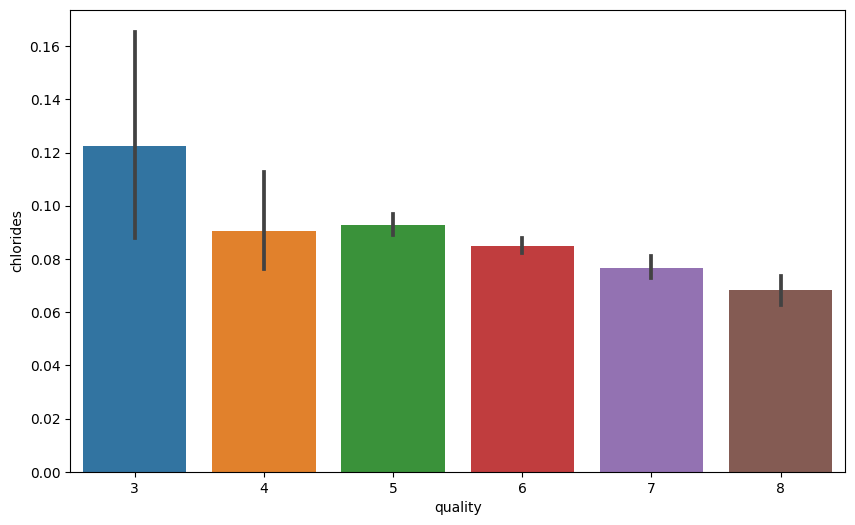

In [180]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='chlorides', data= df)


In [181]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality']=pd.cut(df['quality'], bins=bins, labels= group_names)



In [182]:
lq = LabelEncoder()
df['quality']=lq.fit_transform(df['quality'])
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [183]:
x= df.drop('quality', axis= 1)
y= df['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [184]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [185]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [186]:
print('Accuracy Score=', accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Accuracy Score= 0.875
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.36      0.46        47

    accuracy                           0.88       320
   macro avg       0.76      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320



HERE CLEARLY THE RANDOM FOREST CLASSIFIER METHOD HAS A BETTER ACCURACY OF 87.5%, NOW WE WILL DO ANOTHER METHOD WHICH IS THE SVC METHOD:

In [187]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test)

In [188]:
print('Accuracy Score=', accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

Accuracy Score= 0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



ACCURACY SCORE IS THE SAME HERE, NOW WE WILL DO GRIDSEARCH METHOD:

In [189]:
from sklearn.model_selection import GridSearchCV

In [193]:
param = {
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],
    'kernel':['linear', 'rbf'],
    'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]
}
grid = GridSearchCV(svc, param, cv=10, verbose=2)

In [195]:
grid.fit(x_train, y_train)
pred_grid = grid.predict(x_test)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

In [196]:
print('Accuracy Score=', accuracy_score(y_test, pred_grid))
print(classification_report(y_test, pred_grid))

Accuracy Score= 0.896875
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



AS WE CAN SEE OUR ACCURACY SCORE HAS INCREASED TO NEARLY 90% SO THE GRIDSEARCH METHOD GAVE US THE MOST ACCURATE RESULTS